In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
X = df.copy()
df['species'] = iris.target
y = df.species.copy()


for i, j in enumerate(iris.target_names):
    print(f"{i}: {j}")

nclasses = 3

0: setosa
1: versicolor
2: virginica


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
def accuracy(y, h):
    return np.sum(y == h)/len(y)*100

In [ ]:
class MultiClassLogReg:    
    def fit(self, X, y, nepochs=1000, lr=0.1):
        nepochs = int(nepochs)
        onehot_encoder = OneHotEncoder(sparse=False)
        y_oh = onehot_encoder.fit_transform(y.reshape(-1,1))
        self.W = np.zeros((X.shape[1], y_oh.shape[1]))
        self.B = 0
        epochs = [i for i in range(nepochs)] 
        losses = []
        W_lst = []
    
        for _ in range(nepochs):
            z = - (np.dot(X, self.W) + self.B)
            h = softmax(z, axis=1)
            N = X.shape[0]
            dw = 1/N * (np.dot(X.T,(y_oh - h)))
            db = 1/N * np.sum(y_oh - h)
            self.W -= lr * dw
            self.B -= lr * db
            W_lst.append(self.W)
            losses.append(self.loss(X, y_oh))

        self.loss_helper = {'epochs': epochs, 'loss': losses}

    def loss(self, X, y):
        z = - (np.dot(X, self.W) + self.B)
        N = X.shape[0]
        loss = 1/N * (np.trace(np.dot(X, np.dot(self.W, y.T))) + np.sum(np.log(np.sum(np.exp(z), axis=1))))
        return loss

    def predict(self, X):
        z = - (np.dot(X, self.W) + self.B)
        h = softmax(z, axis=1)
        return np.argmax(h, axis=1)


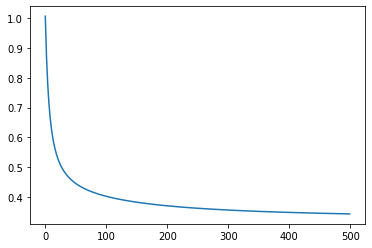

In [ ]:
model = MultiClassLogReg()
model.fit(np.asarray(X_train), np.asarray(y_train), 500, 0.1)
plot = model.loss_helper
plt.plot(plot['epochs'], plot['loss'])

In [ ]:
hyperparams = {
    'lr': [0.1, 0.01, 0.02, 0.03, 0.001],
    'epochs': [100, 500, 1000, 1200, 5000]
}

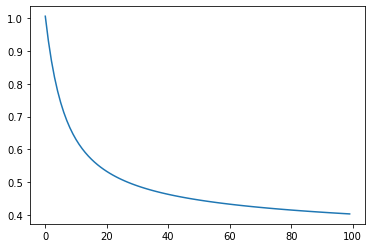

lr=0.1, 100 epochs, acc = 96.66666666666667


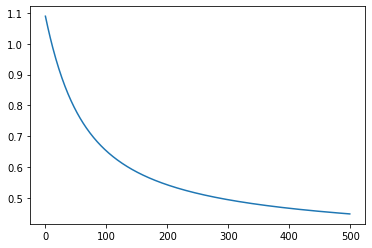

lr=0.01, 500 epochs, acc = 93.33333333333333


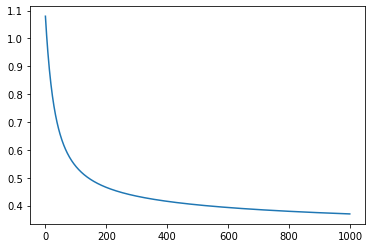

lr=0.02, 1000 epochs, acc = 100.0


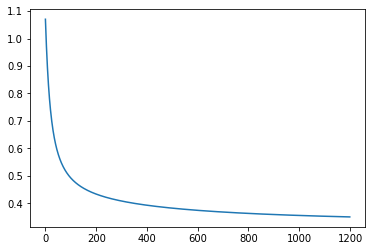

lr=0.03, 1200 epochs, acc = 100.0


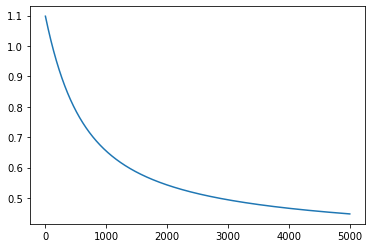

lr=0.001, 5000 epochs, acc = 93.33333333333333


In [ ]:
mses = []
for i in range(len(hyperparams['lr'])):
    model.fit(np.asarray(X_train), np.asarray(y_train), hyperparams['epochs'][i], hyperparams['lr'][i])
    plot = model.loss_helper
    plt.plot(plot['epochs'], plot['loss'])
    plt.show()
    val_p = model.predict(np.asarray(X_val))
    acc = accuracy(np.asarray(y_val), (val_p))
    print(f"lr={hyperparams['lr'][i]}, {hyperparams['epochs'][i]} epochs, acc = {acc}")

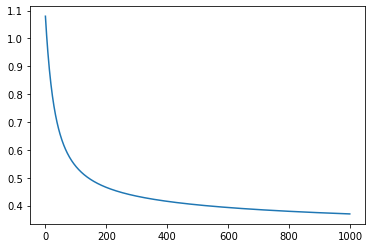

93.33333333333333


In [ ]:
# selecting lr=0.02, 1000 epochs, acc = 100.0

model.fit(np.asarray(X_train), np.asarray(y_train), 1000, 0.02)
plot = model.loss_helper
plt.plot(plot['epochs'], plot['loss'])
plt.show()
acc = accuracy(np.asarray(y_val), (val_p))
print(acc)


In [ ]:
valsize = [0.25, 0.1, 0.5, 0.8]
for i in valsize:
     